### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [46]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [47]:
wine['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [48]:
# Drop duplicates

wine.drop_duplicates(inplace=True)

In [49]:
wine['type'] = wine['type'].astype('category')
wine['type'] = wine['type'].cat.codes

In [50]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,1,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [51]:
wine.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [52]:
wine.dropna(inplace=True)

In [53]:
# Your Code goes Here

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.drop(columns=['type']), wine['type'], random_state=42, test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(4236, 12)
(1059, 12)


In [54]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1447,7.4,0.16,0.49,1.2,0.055,18.0,150.0,0.99170,3.23,0.47,11.200000,6
3322,5.7,0.26,0.30,1.8,0.039,30.0,105.0,0.98995,3.48,0.52,12.500000,7
3753,6.6,0.27,0.33,1.4,0.042,24.0,183.0,0.99215,3.29,0.46,10.700000,5
1385,6.2,0.33,0.29,1.3,0.042,26.0,138.0,0.99560,3.77,0.64,9.500000,5
3153,5.8,0.29,0.33,3.7,0.029,30.0,88.0,0.98994,3.25,0.42,12.300000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3830,4.8,0.26,0.23,10.6,0.034,23.0,111.0,0.99274,3.46,0.28,11.500000,7
4699,6.8,0.30,0.33,12.8,0.041,60.0,168.0,0.99659,3.10,0.56,9.800000,5
6373,5.3,0.47,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667,7
6414,6.1,0.32,0.25,2.3,0.071,23.0,58.0,0.99633,3.42,0.97,10.600000,5


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### KNN without PCA

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9933899905571294

### KNN with PCA

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [59]:
knn = KNeighborsClassifier()

knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [60]:
y_pred = knn.predict(X_test_trf)

accuracy_score(y_test, y_pred)

0.9933899905571294

In [61]:
X_train_trf.shape[1]

12

In [62]:
scores = []

for i in range(1, X_train_trf.shape[1]):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred = knn.predict(X_test_trf)
    
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print('n_components: ', i, ' : ', score)

n_components:  1  :  0.9754485363550519
n_components:  2  :  0.9763928234183191
n_components:  3  :  0.9754485363550519
n_components:  4  :  0.9858356940509915
n_components:  5  :  0.9886685552407932
n_components:  6  :  0.9886685552407932
n_components:  7  :  0.9905571293673276
n_components:  8  :  0.9933899905571294
n_components:  9  :  0.9924457034938622
n_components:  10  :  0.9924457034938622
n_components:  11  :  0.9924457034938622


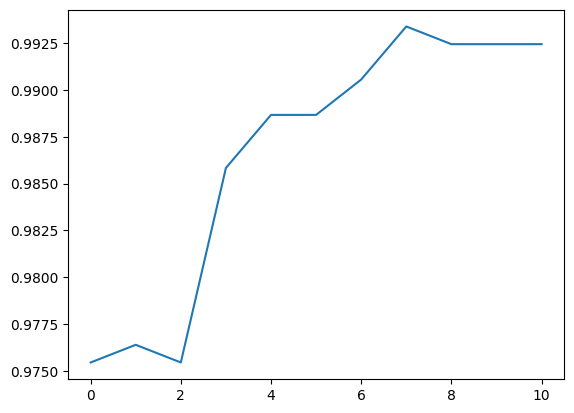

In [65]:
import matplotlib.pyplot as plt

plt.plot(scores)